# [SWCON253] Machine Learning
Instructor: Yeongwoong Kim (duddnd7575@khu.ac.kr)

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

---

# P6.A: PCA를 이용한 차원 축소 (5점)

### 학습목표
- PCA를 이용하는 방법을 익힌다.
- PCA를 이용하여 차원축소를 수행할 수 있다.

### 실습내용
Scikit-Learn의 PCA를 이용하여 차원 축소를 수행합니다.

실습은 다음 순서로 진행됩니다.
- 1) 데이터셋 loading
- 2) 모델 학습 **<직접 구현>**
- 3) 모델 시각화
- 4) Discussion

**이번 실습에서 여러분은 `2)` 부분의 코드를 직접 작성합니다.**

### 점수
- 코드 구현: 2점, `#<your code>` 한 부분 마다 1점.
- Discussion: 3점, 1번 1점 3번 2점.

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

## 1) Loading the Dataset and visualization
랜덤으로 가우시안 분포의 데이터를 생성합니다.

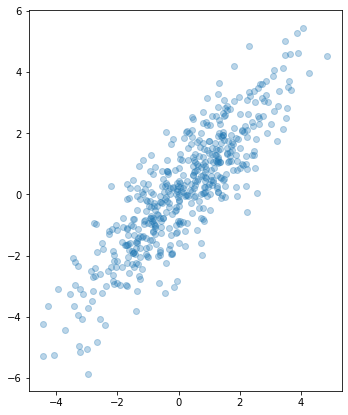

In [2]:
# 랜덤으로 지정한 variance를 갖는 가우시안 분포의 데이터를 생성합니다.
rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3],
       [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)

# 시각화
plt.figure(figsize=(7, 7))
plt.axes().set_aspect('equal')
plt.scatter(X[:, 0], X[:, 1], alpha=.3, label='samples')


## 2) PCA 학습

PCA는 Principal component analysis의 약자로 한국말로 주성분 분석입니다.
여기서 주성분(Principal component)란, 해당 데이터에 대해서 가장 큰 분산을 갖는 축의 방향 벡터를 의미합니다.

예시와 함께 살펴보겠습니다.

![](https://gblobscdn.gitbook.com/assets%2F-LvMRntv-nKvtl7WOpCz%2F-LvMRp9FltcwEeVxPYFs%2F-LvMRsnY_7eleRIHVcgg%2FPCAAnimation.gif?alt=media)

위와 같은 분포의 데이터가 있을 때 두개의 주성분을 찾는다고 한다면, 데이터를 정사영(projection) 시켰을 때 ***가장 큰 분산***을 갖도록 하는 축의 방향 벡터가 바로 첫번째 주성분(분홍축)이 되게 됩니다.

이어서 다음 주성분은 첫 번째 주성분에 ***수직***이면서 데이터를 정사형 시켰을때 가장 큰 분산을 갖도록하는 축이 두 번째 주성분이 되게 됩니다.

---

주성분 분석은 다양한 응용이 있습니다.
- 고차원 데이터를 저차원으로 축소
- 특징 벡터 추출
- Eigen Face 추출을 통한 얼굴인식, 안경 제거 등

**생성한 2차원 평면의 데이터에 대한 주성분분석을 진행합니다. (Scikit-learn의 PCA 클래스 이용)**
- n_components 를 데이터의 차원에 맞게 설정합니다.
- fit 함수를 이용하여 학습을 진행합니다.
- Scikit-learn documents를 참고하시기 바랍니다. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [3]:
# Train PCA
# <your code> PCA 클래스 생성
# <your code> 학습 진행
pca = PCA(n_components=2)
pca.fit(X)


PCA(n_components=2)

**주성분 분석을 통해 주성분, 즉 데이터의 분산이 가장 큰 방향 벡터와 주성분의 분산을 알 수 있습니다.**
- PCA.components_는 주성분을 반환합니다.
- PCA.explained_variance_은 주성분의 분산을 반환합니다.
- 아래 셀을 실행시켜 이를 확인해봅니다.

In [4]:
print(f'Principal Components 1: {pca.components_[0]:}, Variance: {pca.explained_variance_[0]:.3f}')
print(f'Principal Components 2: {pca.components_[1]:}, Variance: {pca.explained_variance_[1]:.3f}')

Principal Components 1: [-0.64402153 -0.76500736], Variance: 6.212
Principal Components 2: [ 0.76500736 -0.64402153], Variance: 0.459


## 3) 시각화

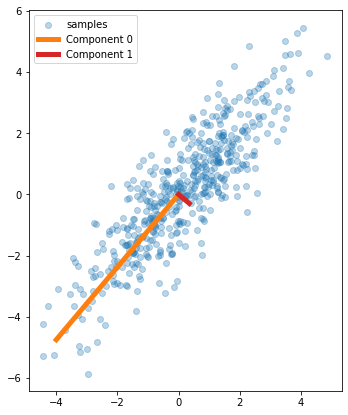

In [5]:
plt.figure(figsize=(7, 7))
plt.axes().set_aspect('equal')
plt.scatter(X[:, 0], X[:, 1], alpha=.3, label='samples')

for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    # scale component by its variance explanation power
    comp = comp * var  
    plt.plot([0, comp[0]], [0, comp[1]], label=f"Component {i}", linewidth=5,
             color=f"C{i * 2 + 1}")
plt.legend()
plt.show()

## 4) Discussion

**1) PCA에서 Eigen value는 무엇인지, Eigen value는 Principal Component와 어떤 차이점이 있는지 설명하세요. (1점)**

**2) 4차원 데이터에 대해 PCA를 적용하여 얻은 Eigen value는 0.98, 0.84, 0.75, 0.2라고 가정했을 때, 몇개의 Principal Component를 선택하는게 효율적인 압축방법일까요? Principal Component의 갯수와 그만큼 선택한 이유를 설명하세요. (2점)**

1) 고유값은 PCA에서 방향은 데이터들의 흩어진 방향을 뜻하고, 크기는 흩어진 정도를 뜻한다. 그 값들을 큰 순서대로 나열한 값을 PC라고 부른다. 

2)큰 값인 0.98 0.84 0.75로 하는 것이 차원압축에 효과적이다. 고윳값이 크기 때문에 데이터의 분포를 잘 반영한다고 할 수 있다. 즉, principal components는 3개가 적당하다.

# P6.B: PCA를 이용한 군집화 (5점)

### 학습목표
- PCA를 이용하여 IRIS데이터를 군집화 할 수 있다.
- Scikit-Learn을 이용하여 모델 학습 과정을 구현할 수 있다.

### 실습내용
Scikit-Learn의 PCA를 이용하여 군집화가 가능한지 확인해 봅니다. 

실습은 다음 순서로 진행됩니다.
- 1) 데이터셋 loading
- 2) PCA 모델 구현, 학습, 시각화 **<직접 구현>**
- 3) Discussion

**이번 실습에서 여러분은 `2)` 부분의 코드를 직접 작성합니다.**


### 점수
- 모델 작성: 4점, `#<your code>` 한 부분 마다 1점.
- Discussion: 1점

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import PCA

## 1) 데이터셋 loading
앞의 실습에서 사용하였던 IRIS 데이터를 사용합니다.

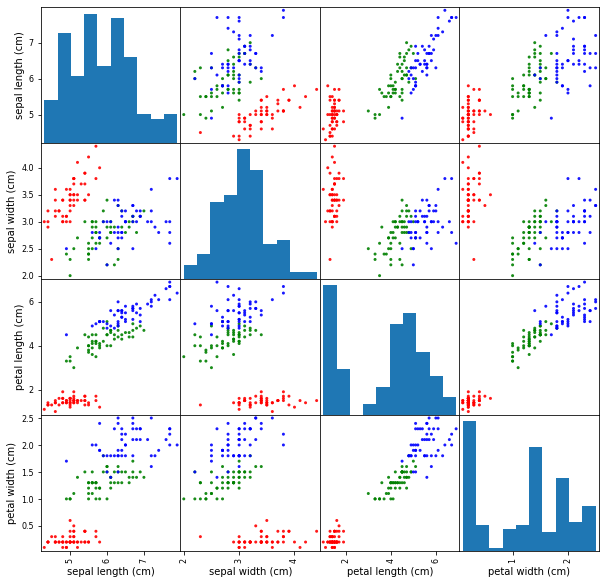

In [7]:
iris = datasets.load_iris()
# <your code> iris 데이터셋에서 데이터만 추출합니다. 이번 실습에서는 4개의 특징을 모두 사용합니다.
# <your code> iris 데이터셋에서 타겟만 추출합니다.
X = iris.data
y = iris.target

# 데이터셋 plot
# 이 Plot은 scatter matrix 혹은 pairplot으로, 다변수 데이터셋에서 두개의 변수끼리 짝을지어 분포를 시각화하는 방법입니다.
# 어떤 변수끼리가 상관성이 높은지 분포는 어떻게 되는지를 살펴볼 수 있습니다.
colors=np.array(50*['r']+50*['g']+50*['b'])
pd.plotting.scatter_matrix(pd.DataFrame(iris.data, columns=iris.feature_names), alpha=0.9, figsize=(10,10), color=colors)
plt.show()

## 2) PCA 모델 구현, 학습, 시각화

PCA모델을 이용하여 위 데이터셋을 군집화해 봅니다.

우리는 PCA가 고차원 정보를 저차원으로 축소한다는 사실을 배웠습니다. 하지만 단순히 저차원으로 축소하는 것이 아니라 분산이 최대가 되는 방향으로 축소를 하게 됩니다.  
이러한 특징은 결과적으로 PCA가 일종의 클러스터링을 수행한다고도 볼 수 있습니다.

![](https://i.stack.imgur.com/gZMOV.png)

위 그림과 같이 3차원상의 데이터를 PCA를 통해 2차원으로 변환하면 아웃라이어를 제거하면서 모호한 경계를 더욱 뚜렷하게 변환하는 것을 볼 수 있습니다.  
수학적인 수식이나 PCA와 클러스터링의 관계를 더 알아보려면 다음 링크를 참조하세요.

**\[더 읽어보기\]** [PCA를 통해 클러스터링이 가능할까요? (PCA와 K-Means의 관계)](https://stats.stackexchange.com/questions/183236/what-is-the-relation-between-k-means-clustering-and-pca#:~:text=PCA%20is%20used%20to%20project%20the%20data%20onto%20two%20dimensions.&text=%22PCA%20aims%20at%20compressing%20the,the%20N%20data-points.%22)

---

**4개의 특징갖는 IRIS 데이터를 PCA를 통해 3개의 특징으로 축소한 후, 각 데이터의 분포를 3D plot에서 살펴봅니다.**
- n_components를 상황에 맞게 설정하여 PCA 모델을 생성합니다.
- Documents를 참조하여 **학습 후 차원 축소된 데이터를 반환**하는 함수를 찾아 사용합니다.  
- Scikit-learn documents를 참고하시기 바랍니다. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [14]:
# PCA 학습
pca =   PCA(n_components=3)
X_hat = pca.fit_transform(X)

<ipython-input-15-580484d133b9>:21: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-15-580484d133b9>:22: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-15-580484d133b9>:23: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


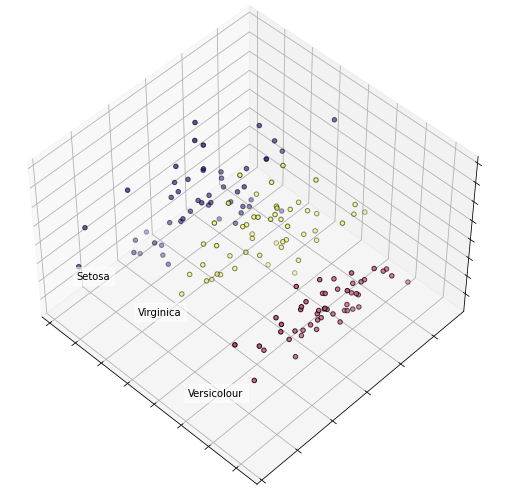

In [15]:
# 시각화
fig = plt.figure(1, figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134, auto_add_to_figure=False)    # define 3D axis
fig.add_axes(ax)

# Reorder the labels to have colors matching the cluster results
y_hat = np.choose(y, [1, 2, 0]).astype(float)

# show labels
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_hat[y_hat == label, 0].mean(),
              X_hat[y_hat == label, 1].mean() + 1.5,
              X_hat[y_hat == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))


ax.scatter(X_hat[:, 0], X_hat[:, 1], X_hat[:, 2], c=y_hat, cmap=plt.cm.plasma,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

## 3) Discussion

**1) PCA에는 다양한 응용 분야가 있습니다. 3개 이상 찾고 각 분야에서 어떻게 사용되는지 설명해 보세요. (1점)**
- 1.영상인식에 사용된다. 이미지 갯수를 N이라고 하고 크기를 x*y라고 하면, 각각, x*y*3차원의 벡터를 갖게 된다. 이를 계산하기에는 어려우므로 차원축소를 이용하여 계산한다.
- 2. 데이터를 압축할때에도 차원을 감소시킬때 쓴다.
- 3. k개의 주성분 만을 이용하기 때문에 노이즈 부분을 제거할 수 있다. 따라서 데이터를 복원할 때, 노이즈를 제거하기 위해서도 PCA를 쓴다.

**2) 구현하면서 든 질문에 대해 적고 답할 수 있다면 스스로 답해보세요.**

-world coordinate를 2d coordinate으로 변환할 때에도 사용할 수 있는가?
3차원에서의 물체를 d좌표는 따로저장한다고 한다면, 2d좌표로 변환할 수 있을 것 같다.

---

